In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Data from Source
df=pd.read_csv('Source2.csv')

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# Checking for Null values
print(df.shape)
print(df.isnull().values.sum())
print(df.info())

(3999, 14)
1109
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   3999 non-null   object 
 1   HomePlanet    3907 non-null   object 
 2   CryoSleep     3907 non-null   object 
 3   Cabin         3892 non-null   object 
 4   Destination   3925 non-null   object 
 5   Age           3909 non-null   float64
 6   VIP           3910 non-null   object 
 7   RoomService   3905 non-null   float64
 8   FoodCourt     3908 non-null   float64
 9   ShoppingMall  3896 non-null   float64
 10  Spa           3912 non-null   float64
 11  VRDeck        3904 non-null   float64
 12  Name          3904 non-null   object 
 13  Transported   3999 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 410.2+ KB
None


In [4]:
# As name column has no relevance we can drop that columns
df.drop(columns=['Name'],axis=1,inplace=True)

# Converting cryosleep, vip, Transported column to numerical column using Label Encoding as they only contains True/False
from sklearn.preprocessing import LabelEncoder

cols=['CryoSleep','VIP','Transported']
labelEncoder=LabelEncoder()
df[cols]=df[cols].apply(labelEncoder.fit_transform)

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


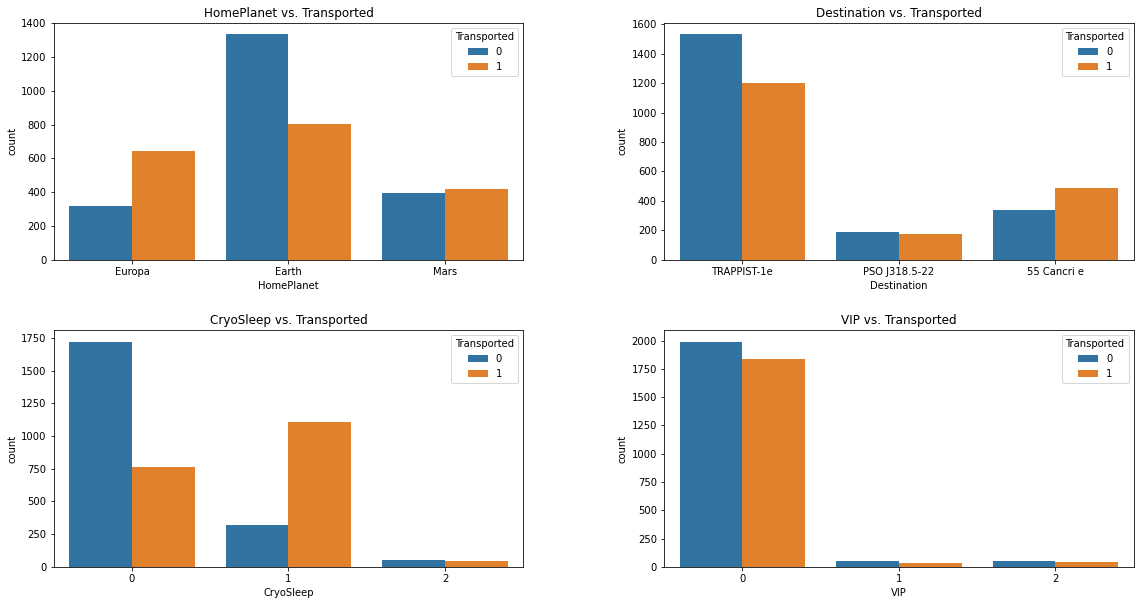

HomePlanet
Earth     0.375000
Mars      0.512947
Europa    0.667708
Name: Transported, dtype: float64
-------------------------------------------------------------
Destination
TRAPPIST-1e      0.439605
PSO J318.5-22    0.479339
55 Cancri e      0.590361
Name: Transported, dtype: float64
-------------------------------------------------------------
CryoSleep
0    0.306887
2    0.445652
1    0.776685
Name: Transported, dtype: float64
-------------------------------------------------------------
VIP
1    0.380952
2    0.471910
0    0.479613
Name: Transported, dtype: float64


In [95]:
# Visualizing Data
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)

sns.countplot(data=df,x='HomePlanet',hue='Transported')
plt.title('HomePlanet vs. Transported')

plt.subplot(2,2,2)
sns.countplot(data=df,x='Destination',hue='Transported')
plt.title('Destination vs. Transported')

plt.subplot(2,2,3)
sns.countplot(data=df,x='CryoSleep',hue='Transported')
plt.title('CryoSleep vs. Transported')

plt.subplot(2,2,4)
sns.countplot(data=df,x='VIP',hue='Transported')
plt.title('VIP vs. Transported')

plt.subplots_adjust(left=0,right=1.5,wspace=0.3,hspace=0.3)
plt.show()

print(df.groupby('HomePlanet')['Transported'].mean().sort_values())
print("-------------------------------------------------------------")
print(df.groupby('Destination')['Transported'].mean().sort_values())
print("-------------------------------------------------------------")
print(df.groupby('CryoSleep')['Transported'].mean().sort_values())
print("-------------------------------------------------------------")
print(df.groupby('VIP')['Transported'].mean().sort_values())

In [6]:
# From above we can see that max people from VIP 0 got sent into other dimension followed by VIP 2 than VIP 1

In [7]:
df_copy=df.copy()

# Converting remaing categorical columns to numerical using One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()
newvalues=encoder.fit_transform(df_copy[['HomePlanet','Cabin','Destination']]).toarray()

# Dropping Columns
updated=df_copy.drop(columns=['HomePlanet','Cabin','Destination']).values


# Concatenating Columns
transformed=np.concatenate((updated,newvalues),axis=1)

transformed_df=pd.DataFrame(transformed)
print(transformed_df.shape)
print(transformed_df.head)

(3999, 3025)
<bound method NDFrame.head of          0    1     2    3      4       5      6       7      8    9     ...  \
0     0001_01    0  39.0    0    0.0     0.0    0.0     0.0    0.0    0  ...   
1     0002_01    0  24.0    0  109.0     9.0   25.0   549.0   44.0    1  ...   
2     0003_01    0  58.0    1   43.0  3576.0    0.0  6715.0   49.0    0  ...   
3     0003_02    0  33.0    0    0.0  1283.0  371.0  3329.0  193.0    0  ...   
4     0004_01    0  16.0    0  303.0    70.0  151.0   565.0    2.0    1  ...   
...       ...  ...   ...  ...    ...     ...    ...     ...    ...  ...  ...   
3994  4256_07    0  29.0    0   13.0     0.0  664.0    74.0  101.0    0  ...   
3995  4256_08    0  44.0    0    0.0     0.0  608.0     0.0   91.0    0  ...   
3996  4257_01    0  19.0    0    0.0   265.0  882.0     2.0  293.0    0  ...   
3997  4258_01    0  39.0    0    0.0   266.0    0.0  1254.0  197.0    0  ...   
3998  4258_02    2  63.0    0    0.0   490.0    1.0  2882.0   18.0    0  ... 

In [8]:
# Using Simple Imputer to impute blank values with mean of data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer()

imputed_transformed_df=pd.DataFrame(imputer.fit_transform(transformed_df))
imputed_transformed_df.shape
imputed_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024
0,101.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,201.0,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,301.0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,302.0,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,401.0,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# Using Train, Test split to split dataset

from sklearn.model_selection import train_test_split
y=imputed_transformed_df.iloc[1:,9]

imputed_transformed_df.drop(index=9,inplace=True)
print(y.shape)
print(imputed_transformed_df.shape)
x_train,x_test,y_train,y_test=train_test_split(imputed_transformed_df,y,test_size=0.3,shuffle=True)

(3998,)
(3998, 3025)


In [10]:
# As we have lot of fetures, let's try to reduce them using Principal Component Analysis
from sklearn.decomposition import PCA

pca=PCA(n_components=12)
pca_x_train_df=pca.fit_transform(x_train)
pca_x_test_df=pca.fit_transform(x_test)
print(pca_x_train_df.shape)
print(pca_x_test_df.shape)

(2798, 12)
(1200, 12)


Decision Tree
Accuracy Score :  0.9441666666666667
Confusion Matrix :  [[610  28]
 [ 39 523]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       638
         1.0       0.95      0.93      0.94       562

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200

------------------------------------------------------------------------
Random Forest
Accuracy Score :  0.9733333333333334
Confusion Matrix :  [[625  13]
 [ 19 543]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       638
         1.0       0.98      0.97      0.97       562

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200

-----------------------------------

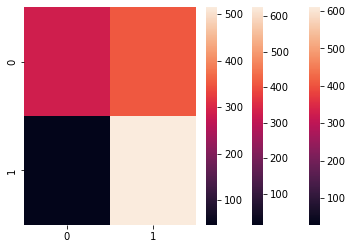

In [68]:
# Predicting accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


score=[]
def checkModelAccuracy(result):
    print("Accuracy Score : ",accuracy_score(y_test, result))
    score.append(accuracy_score(y_test,result))
    print("Confusion Matrix : ",confusion_matrix(y_test,result))
    
    sns.heatmap(confusion_matrix(y_test,result))

    # Classification Report
    from sklearn.metrics import classification_report

    print("Classification Report : ",classification_report(y_test,result))
    
# Lets try different machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

names = ["Decision Tree", "Random Forest", "Logistic Regression"]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression()
    ]

 
for name, clf in zip(names, classifiers):
    if name == "Decision Tree":
        print("Decision Tree")
        clf = DecisionTreeClassifier(random_state=0)
        clf.fit(pca_x_train_df,y_train)
        decisionTreeResult=clf.predict(pca_x_test_df)
        checkModelAccuracy(decisionTreeResult)
        print("------------------------------------------------------------------------")
    elif name == "Logistic Regression":
        print("Logistic Regression")
        clf = LogisticRegression()
        clf.fit(pca_x_train_df,y_train)
        logisticRegressionResult=clf.predict(pca_x_test_df)
        checkModelAccuracy(logisticRegressionResult)
        print("------------------------------------------------------------------------")
    elif name == "Random Forest":
        print("Random Forest")
        clf = RandomForestClassifier(random_state=0)
        model.fit(pca_x_train_df,y_train)
        randomForestResult=model.predict(pca_x_test_df)
        checkModelAccuracy(randomForestResult)
        print("------------------------------------------------------------------------")
print(score)  
print("Best Model is : %s with accuracy of %f"%(names[score.index(max(score))],max(score)))

In [63]:
# As accuracy is slighty low, lets try Cross Validation
from sklearn.model_selection import cross_validate

cv=cross_validate(model,x_train,y_train,cv=10)
cv
# Performing Cross Validation on dataset
print("The cross validated is : ",np.mean(cv['test_score']*100))

The cross validated is :  99.96428571428571


In [64]:
# Trying Bagging Strategy

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

clf = BaggingClassifier(base_estimator=model,
                          n_estimators=10, random_state=0).fit(pca_x_train_df, y_train)
bagging_result=clf.predict(pca_x_test_df)


Accuracy Score :  0.9775
Confusion Matrix :  [[625  13]
 [ 14 548]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       638
         1.0       0.98      0.98      0.98       562

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



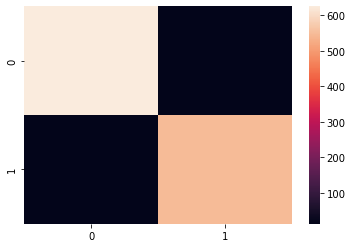

In [65]:
# Checking Accuracy after Bagging
# Predicting accuracy
checkModelAccuracy(bagging_result)

In [41]:
# Trying Boosting
#import xgboost as xgb

#xg = xgb.XGBClassifier(n_estimators = 50, seed = 2, max_depth=20)

#xg.fit(pca_x_train_df, y_train)

#boosting_result = xg.predict(pca_x_test_df)
  
#checkModelAccuracy(boosting_result)